In [1]:
from architext import *
from visualization import *
import pickle
import matplotlib.pyplot as plt
import numpy as np

c:\Users\User\miniconda3\envs\ldm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
np.linspace(0,2000, 20 + 1)[0:-1]

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900.])

In [57]:
np.arange(0, 2000, 100)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])

In [2]:
with open('results/result_2.pkl', 'rb') as f:
    run = pickle.load(f)

In [3]:
prompts = prompts = np.loadtxt('prompts.txt', dtype=str, delimiter='\n')
prompts = ['[prompt] ' + prompt.rstrip() + ' [layout]' for prompt in prompts] 
config = {'seed': 42, }

In [4]:
env = Architext(42, config, height=2.3, prompts=prompts)
elites = MAPElites(env, n_bins=20)

MAP of size: (20, 20) = 400


In [5]:
elites.genomes = run[0]

(array([295., 259.,  43.,  41.,  18.,   3.,   2.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([  43.38028169,  149.97183099,  256.56338028,  363.15492958,
         469.74647887,  576.33802817,  682.92957746,  789.52112676,
         896.11267606, 1002.70422535, 1109.29577465, 1215.88732394,
        1322.47887324, 1429.07042254, 1535.66197183, 1642.25352113,
        1748.84507042, 1855.43661972, 1962.02816901, 2068.61971831,
        2175.21126761]),
 <BarContainer object of 20 artists>)

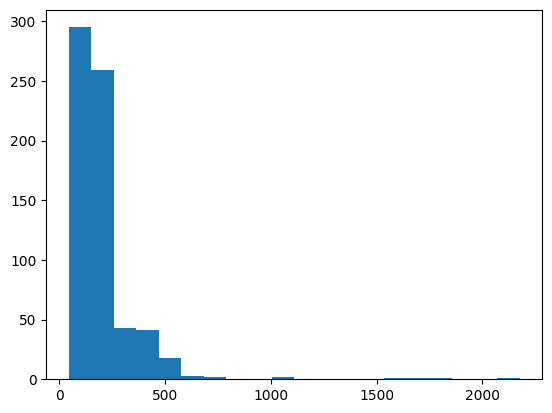

In [54]:
ap_areas = []
for iy, ix in np.ndindex(elites.genomes.shape):
    if(elites.genomes[iy, ix] !=0):
        polygons = elites.genomes[iy, ix].get_polygons()
        ap_areas.append([poly.area/14.2 for poly in polygons])
    else:
        pass
flat_areas = [item for sublist in ap_areas for item in sublist if item<50000]
plt.hist(np.array(flat_areas), bins=20)

In [8]:
for iy, ix in np.ndindex(elites.genomes.shape):
    if(elites.genomes[iy, ix] !=0):
        elites.genomes[iy, ix].get_image().save(f"elite_{iy}-{ix}.png")
    else:
        Image.new('RGB', (256, 256), color='white').save(f"elite_{iy}-{ix}.png")

e:\CarperAI\ELM\_architext\architext.py:204: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  mycoordslist = [list(x.exterior.coords) for x in small_poly]


In [9]:
# Create the empty image to populate the mosaic
grid_img = Image.new('RGB', (5120, 5120), color='white')

In [10]:
# Generate all the map ids in each direction
space_1 = space_2 = np.arange(0, 20, 1)

In [11]:
import itertools
from PIL import ImageOps
for i, x in enumerate(itertools.product(space_1, space_2)):
    row = x[0]
    col = x[1]
    img = Image.open('elite_{}-{}.png'.format(row, col))
    img = ImageOps.expand(img,border=1,fill='black')
    img = img.rotate(-90)
    grid_img.paste(img, (col * 256, row * 256))#(col * width, row * height))
grid_img = grid_img.transpose(Image.ROTATE_90)
grid_img.save("mosaic_20by20.png")

C:\Users\User\AppData\Local\Temp\ipykernel_20124\2432614481.py:10: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  grid_img = grid_img.transpose(Image.ROTATE_90)


In [12]:
coverage = np.matrix.nonzero(elites.genomes)

In [15]:
len(coverage[0]) / (20*12)

0.35

In [2]:
import numpy as np